In [1]:
import pandas as pd
import numpy as np

series = pd.Series([3, 62, 75, 83, 47, 43, 39, 16, 19, 2])
series
series[0]
series[3:6]

3    83
4    47
5    43
dtype: int64

In [11]:
import pandas as pd
 
df = pd.DataFrame({'Age': [30, 20, 22, 40, 32, 28, 39],
                   'Color': ['Blue', 'Green', 'Red', 'White', 'Gray', 'Black',
                             'Red'],
                   'Food': ['Steak', 'Lamb', 'Mango', 'Apple', 'Cheese',
                            'Melon', 'Beans'],
                   'Height': [165, 70, 120, 80, 180, 172, 150],
                   'Score': [4.6, 8.3, 9.0, 3.3, 1.8, 9.5, 2.2],
                   'State': ['NY', 'TX', 'FL', 'AL', 'AK', 'TX', 'TX']
                   },
                  index=['Jane', 'Nick', 'Aaron', 'Penelope', 'Dean',
                         'Christina', 'Cornelia'])
 
df

,Age,Color,Food,Height,Score,State
Jane,30,Blue,Steak,165,4.6,NY
Nick,20,Green,Lamb,70,8.3,TX
Aaron,22,Red,Mango,120,9.0,FL
Penelope,40,White,Apple,80,3.3,AL
Dean,32,Gray,Cheese,180,1.8,AK
Christina,28,Black,Melon,172,9.5,TX
Cornelia,39,Red,Beans,150,2.2,TX


In [132]:
df[df['Food'].isin(['Steak', "Mango"])]

,Age,Color,Food,Height,Score,State
Jane,30,Blue,Steak,165,4.6,NY
Aaron,22,Red,Mango,120,9.0,FL


In [134]:
df[df['Age'] < 30]

,Age,Color,Food,Height,Score,State
Nick,20,Green,Lamb,70,8.3,TX
Aaron,22,Red,Mango,120,9.0,FL
Christina,28,Black,Melon,172,9.5,TX


In [137]:
df[df['State'].str.contains('A')]

,Age,Color,Food,Height,Score,State
Penelope,40,White,Apple,80,3.3,AL
Dean,32,Gray,Cheese,180,1.8,AK


In [30]:
df.filter(like='Fo') 

# 실제 data에서 column이 몇백개가 될 수 있다.
# PRICE01, PRICE02, MODEL01, MODEL02, ..., MODEL99, TS01, TS02, TS03

,Food
Jane,Steak
Nick,Lamb
Aaron,Mango
Penelope,Apple
Dean,Cheese
Christina,Melon
Cornelia,Beans


In [98]:
# !wget https://raw.githubusercontent.com/alanderex/pydata-pandas-workshop/master/data/blooth_sales_data.csv
sales_data = pd.read_csv('blooth_sales_data.csv', parse_dates=['birthday', 'orderdate'], dayfirst=True)
# Map, apply
sales_data

,name,birthday,customer,orderdate,product,units,unitprice
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,2,13.27
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,26,24458.69
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,41,15.79
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.156638,iPhone,16,584.01
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,4,25.69
...,...,...,...,...,...,...,...
995,Ethan,1952-12-08,Application Industries,2016-07-21 13:48:03.177885,Harry Potter book,39,24.40
996,Rudolph,1959-10-15,Network Software West Inc,2016-07-19 13:48:03.177903,Rubik’s Cube,9,15.11
997,Annmarie,1982-06-04,Atlantic Corporation,2016-07-13 13:48:03.177924,Thriller record,19,9.16
998,Chang,1984-02-05,Venture Alpha Corporation,2016-07-13 13:48:03.177943,Harry Potter book,24,28.21


In [99]:
sales_data['year'] = sales_data['orderdate'].map(lambda x: x.year)
sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,year
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,2,13.27,2016
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,26,24458.69,2016
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,41,15.79,2016
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.156638,iPhone,16,584.01,2016
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,4,25.69,2016


In [100]:
# apply
sales_data[['unitprice', 'units']].apply(lambda x: np.round(4 * x, 2))

,unitprice,units
0,53.08,8
1,97834.76,104
2,63.16,164
3,2336.04,64
4,102.76,16
...,...,...
995,97.60,156
996,60.44,36
997,36.64,76
998,112.84,96


In [101]:
# apply
print(sales_data[['unitprice', 'units']].apply(sum, axis=0))
sales_data[['unitprice', 'units']].apply(sum, axis=1)

unitprice    2202873.99
units          25842.00
dtype: float64


0         15.27
1      24484.69
2         56.79
3        600.01
4         29.69
         ...   
995       63.40
996       24.11
997       28.16
998       52.21
999      702.83
Length: 1000, dtype: float64

In [79]:
# set value

sales_data.set_value(1, 'unitprice', 1)
sales_data.set_value(4, 'unitprice', 0)
sales_data.set_value(3, 'product', "Galaxy S8")
sales_data.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,name,birthday,customer,orderdate,product,units,unitprice,year,unitprice_units
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,8,53.08,2016,61.08
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,104,1.00,2016,97938.76
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,164,63.16,2016,227.16
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.156638,Galaxy S8,64,2336.04,2016,2400.04
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,16,0.00,2016,118.76


In [80]:
sales_data.at[1, 'unitprice'] = np.NaN
sales_data.at[4, 'unitprice'] = np.NaN
sales_data.at[3, 'orderdate'] = np.NaN
sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,year,unitprice_units
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,8,53.08,2016,61.08
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,104,NaN,2016,97938.76
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,164,63.16,2016,227.16
3,Cori,1986-11-05,Signal Industries,NaT,Galaxy S8,64,2336.04,2016,2400.04
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,16,NaN,2016,118.76


In [81]:
sales_data[sales_data['unitprice'].isnull()]

,name,birthday,customer,orderdate,product,units,unitprice,year,unitprice_units
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,104,NaN,2016,97938.76
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,16,NaN,2016,118.76


In [82]:
sales_data.dropna().head(5)

,name,birthday,customer,orderdate,product,units,unitprice,year,unitprice_units
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,8,53.08,2016,61.08
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,164,63.16,2016,227.16
5,Weldon,1953-03-17,Network Application Co,2016-07-22 13:48:03.156678,Lipitor,4,44.88,2016,48.88
6,Sung,1977-10-23,Omega Pacific Future Incorporated,2016-07-09 13:48:03.156698,PlayStation,100,1179.60,2016,1279.60
7,Emily,1982-07-02,Medicine Incorporated,2016-07-16 13:48:03.156717,Thriller record,20,73.08,2016,93.08


In [83]:
sales_data.fillna(99.99).head(5)

,name,birthday,customer,orderdate,product,units,unitprice,year,unitprice_units
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,8,53.08,2016,61.08
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,104,99.99,2016,97938.76
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,164,63.16,2016,227.16
3,Cori,1986-11-05,Signal Industries,99.99,Galaxy S8,64,2336.04,2016,2400.04
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,16,99.99,2016,118.76


In [84]:
sales_data.head()

,name,birthday,customer,orderdate,product,units,unitprice,year,unitprice_units
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,8,53.08,2016,61.08
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,104,NaN,2016,97938.76
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,164,63.16,2016,227.16
3,Cori,1986-11-05,Signal Industries,NaT,Galaxy S8,64,2336.04,2016,2400.04
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,16,NaN,2016,118.76


In [85]:
# deep copy & shallow
sales_data.fillna(99.99, inplace=True)
sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,year,unitprice_units
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,8,53.08,2016,61.08
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,104,99.99,2016,97938.76
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,164,63.16,2016,227.16
3,Cori,1986-11-05,Signal Industries,99.99,Galaxy S8,64,2336.04,2016,2400.04
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,16,99.99,2016,118.76


## Visualization

In [105]:
# sales_data = pd.read_excel('../data/blooth_sales_data_clean.xlsx' )
sales_data.head(5)
sales_data['turnover'] = sales_data['unitprice'] * sales_data['units']

sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,year,weekday,turnover
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.156566,Thriller record,2,13.27,2016,6,26.54
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.156596,Corolla,26,24458.69,2016,2,635925.94
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.156618,Rubik’s Cube,41,15.79,2016,4,647.39
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.156638,iPhone,16,584.01,2016,5,9344.16
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.156657,Harry Potter book,4,25.69,2016,5,102.76


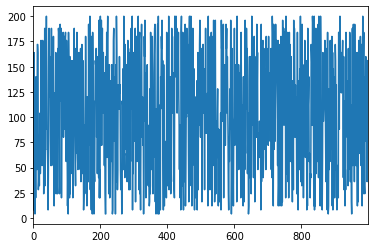

In [89]:
sales_data['units'].plot()

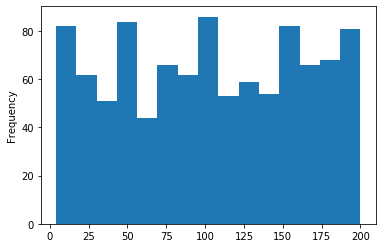

In [90]:
sales_data['units'].plot.hist(bins=15);

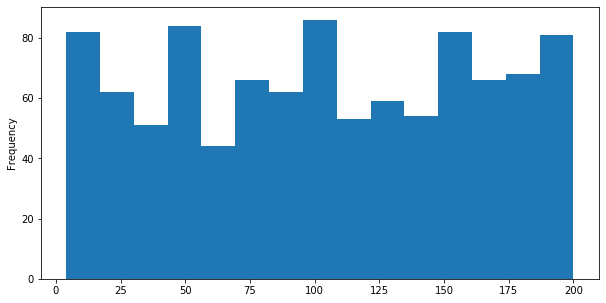

In [91]:
sales_data['units'].plot.hist(bins=15,
                             figsize=(10,5));

In [128]:
tt = sales_data[['product', 'turnover']].groupby('product').sum()
tt

,turnover
product,
Corolla,53191480.51
Harry Potter book,51673.67
Lipitor,25435.05
PlayStation,718578.51
Rubik’s Cube,44957.49
Star Wars,28329.24
Thriller record,33806.96
banana,25690.00
iPad,2028467.59


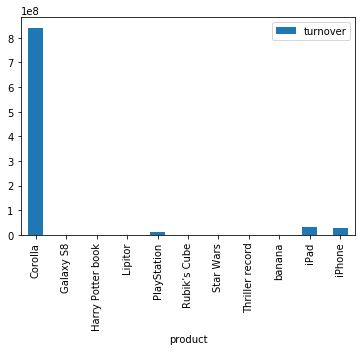

In [94]:
tt.plot.bar();

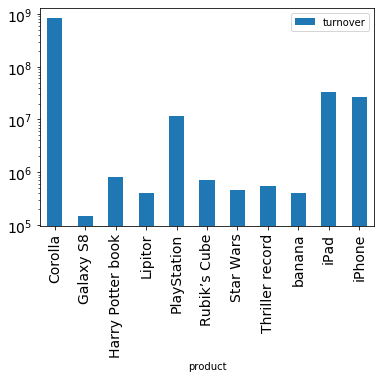

In [102]:
# NLP long tail
tt.plot.bar(logy=True, fontsize=14);

![alt text](http://www.tulane.edu/~howard/NLP/_images/wubFDplotAll.png)

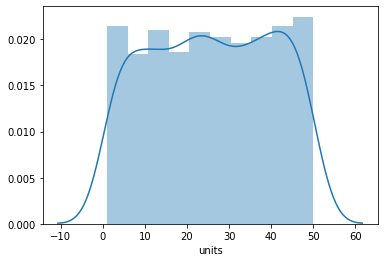

In [108]:
## seaborn

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(sales_data['units']);

In [106]:
sales_data['weekday'] = sales_data['orderdate'].map(lambda x: x.weekday())
sales_50 = sales_data[sales_data['unitprice']<50][['units', 'turnover', 'product', 'weekday']]
sales_50

,units,turnover,product,weekday
0,2,26.54,Thriller record,6
2,41,647.39,Rubik’s Cube,4
4,4,102.76,Harry Potter book,5
5,1,11.22,Lipitor,4
7,5,91.35,Thriller record,5
...,...,...,...,...
994,27,271.89,Lipitor,6
995,39,951.60,Harry Potter book,3
996,9,135.99,Rubik’s Cube,1
997,19,174.04,Thriller record,2


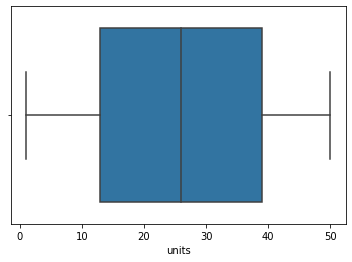

In [109]:
sns.boxplot(sales_50['units']);

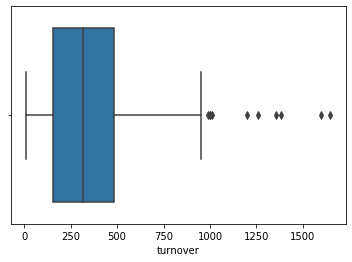

In [110]:
sns.boxplot(sales_50['turnover']);

In [113]:
# Aggregation

sales_data.groupby('customer').count()[:5]

,name,birthday,orderdate,product,units,unitprice,year,weekday,turnover
customer,,,,,,,,,
Advanced Incorporated,5,5,5,5,5,5,5,5,5
Advanced Limited,3,3,3,3,3,3,3,3,3
Advanced People Telecom Incorporated,3,3,3,3,3,3,3,3,3
Advanced Resource LLC,1,1,1,1,1,1,1,1,1
Alpha Industries,4,4,4,4,4,4,4,4,4


In [116]:
sales_data.groupby('customer').count()

,name,birthday,orderdate,product,units,unitprice,year,weekday,turnover
customer,,,,,,,,,
Advanced Incorporated,5,5,5,5,5,5,5,5,5
Advanced Limited,3,3,3,3,3,3,3,3,3
Advanced People Telecom Incorporated,3,3,3,3,3,3,3,3,3
Advanced Resource LLC,1,1,1,1,1,1,1,1,1
Alpha Industries,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...
Vision Speed International,5,5,5,5,5,5,5,5,5
Vision Telecom Adventure Limited,2,2,2,2,2,2,2,2,2
West Building Digital Limited,5,5,5,5,5,5,5,5,5


In [117]:
sales_data.groupby(['customer', 'product']).sum().sort_values('turnover', ascending=False)[:5]

,,units,unitprice,year,weekday,turnover
customer,product,,,,,
Electronics Resource Group,Corolla,73,48397.05,4032,8,1761028.86
Interactive International,Corolla,74,44386.43,4032,6,1657451.10
General Contract Corporation,Corolla,73,42970.93,4032,6,1570308.92
Data Building Corporation,Corolla,61,43250.93,4032,6,1326018.58
Max Technology Incorporated,Corolla,52,45123.84,4032,4,1208129.52


In [119]:
sales_data.groupby(['customer', 'product']).sum()

units  unitprice  ...  weekday  turnover
customer               product                              ...                   
Advanced Incorporated  Harry Potter book      6      19.19  ...        3    115.14
                       Lipitor               38      11.80  ...        6    448.40
                       Rubik’s Cube          11      15.88  ...        2    174.68
                       Thriller record       18       8.56  ...        6    154.08
                       iPad                   3     676.63  ...        4   2029.89
...                                         ...        ...  ...      ...       ...
West Solutions Limited Lipitor               30      10.29  ...        6    308.70
                       PlayStation           44     255.70  ...        3  11250.80
                       Rubik’s Cube           2      16.10  ...        1     32.20
                       Thriller record       29      19.55  ...        5    566.95
                       iPhone                42    1465.90  ...       12  28508.20

[849 rows x 5 columns]

In [124]:
sales_data['turnover'].agg([sum, min, max])

sum    57794302.12
min          10.00
max     1206764.65
Name: turnover, dtype: float64

In [125]:
def mean(series):
    return series.sum()/series.count()

sales_data[['turnover', 'units']].agg(mean)

turnover    57794.30212
units          25.84200
dtype: float64